In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import textwrap

# Load dataset
train_path = "Dataset/jobs_DW_bin.new.10.train.npz"  # Update path if needed
data = np.load(train_path)

# Extract dataset components
X = data['x'][:, :, 0]  # Covariates (Taking first time step for analysis)
t = data['t']  # Treatment assignment
yf = data['yf']  # Factual outcome
ate = data['ate']  # True Average Treatment Effect

# Jobs Dataset Exploration

This notebook provides an overview and exploration of the **Jobs dataset**, a commonly used dataset for causal inference studies.
It follows the structure of the **IHDP dataset**, as described in Shalit et al. (2017). The dataset includes:

- **Covariates (`x`)**: 17 pre-treatment features describing individuals' demographics and socioeconomic factors.
- **Treatment (`t`)**: Binary indicator (1 = received training, 0 = did not receive training).
- **Factual Outcome (`yf`)**: Binary employment outcome after treatment (1 = employed, 0 = unemployed).
- **True Average Treatment Effect (`ate`)**: Available since this is a semi-simulated dataset.

This notebook explores these components using **Python and visualization techniques**.

## Checking Dataset Structure

Let's inspect the structure of the dataset to understand what each component contains.


In [3]:
# Inspect dataset keys
print("Keys in dataset:", data.files)
print("Feature Matrix Shape (X):", X.shape)
print("Treatment Shape (t):", t.shape)
print("Outcome Shape (yf):", yf.shape)
print("True ATE Shape (ate):", ate.shape)

Keys in dataset: ['ate', 'e', 'I', 'yadd', 'yf', 't', 'x', 'ymul']
Feature Matrix Shape (X): (2570, 17)
Treatment Shape (t): (2570, 10)
Outcome Shape (yf): (2570, 10)
True ATE Shape (ate): (1, 1)


In [4]:
import numpy as np

# Load dataset (assuming data is a .npz file)
data = np.load(train_path)  # Replace with your actual dataset file

# Extract feature matrix
X = data['x']

# Compute summary statistics for each feature
feature_ranges = {
    f"Feature {i+1}": {
        "Min": np.min(X[:, i]),
        "Max": np.max(X[:, i]),
        "Mean": np.mean(X[:, i]),
        "Std": np.std(X[:, i])
    }
    for i in range(X.shape[1])
}

# Print summary statistics
print("\nFeature Summary Statistics:")
for feature, stats in feature_ranges.items():
    print(f"{feature}: Min={stats['Min']}, Max={stats['Max']}, Mean={stats['Mean']:.2f}, Std={stats['Std']:.2f}")


Feature Summary Statistics:
Feature 1: Min=-1.4610949961930897, Max=2.1143372756571006, Mean=0.00, Std=1.00
Feature 2: Min=-3.9868397720589073, Max=1.8054494710632873, Mean=0.00, Std=1.00
Feature 3: Min=0.0, Max=1.0, Mean=0.37, Std=0.48
Feature 4: Min=0.0, Max=1.0, Mean=0.05, Std=0.22
Feature 5: Min=0.0, Max=1.0, Mean=0.71, Std=0.45
Feature 6: Min=0.0, Max=1.0, Mean=0.41, Std=0.49
Feature 7: Min=-1.1474106272396363, Max=8.751987463455608, Mean=0.01, Std=1.00
Feature 8: Min=-1.1104674465327902, Max=10.16506764568288, Mean=0.01, Std=1.00
Feature 9: Min=-1.164047106708605, Max=2.446736878867096, Mean=0.00, Std=1.00
Feature 10: Min=-0.9488315641570118, Max=2.7733355859829296, Mean=0.00, Std=1.00
Feature 11: Min=-2.1439737169943367, Max=2.113701579040823, Mean=0.00, Std=1.00
Feature 12: Min=-0.5580568483682105, Max=23.05284075572758, Mean=0.00, Std=1.00
Feature 13: Min=-0.5188150629967283, Max=29.022641032904374, Mean=0.01, Std=1.00
Feature 14: Min=0.0, Max=1.0, Mean=0.17, Std=0.37
Feature

It matches the Table S4 from the supplementary reading of the paper:
# Table S4: Descriptive Statistics of the Processed Jobs Dataset

| Variable | All patients (3212) | T=1 (297; 9.24%) | T=0 (2915; 90.75%) |
|----------|--------------------|------------------|------------------|
| X1       | Avg = 0.00012765, Std = 0.999874618  | Avg = 0.000127646, Std = 0.999874618 | Avg = 0.000127646, Std = 0.999874618 |
| X2       | Avg = -0.00099, Std = 0.999166151  | Avg = -0.00099004, Std = 0.999166151 | Avg = -0.00099004, Std = 0.999166151 |
| X3       | 1202 (37.4%)  | 238 (80.1%) | 964 (33.03%) |
| X4       | 157 (4.8%)  | 28 (9.42%) | 129 (4.4%) |
| X5       | 2274 (70.7%)  | 50 (16.8%) | 2224 (76.2%) |
| X6       | 1323 (41.1%)  | 217 (73.06%) | 1106 (37.9%) |
| X7       | Avg = -0.0004172, Std = 1.000487399  | Avg = -0.00041719, Std = 1.000487399 | Avg = -0.00041719, Std = 1.000487399 |
| X8       | Avg = 3.11333E-06, Std = 0.999783331  | Avg = 3.11333E-06, Std = 0.999783331 | Avg = 3.11333E-06, Std = 0.999783331 |
| X9       | Avg = -0.00047945, Std = 1.000054882  | Avg = -0.00047945, Std = 1.000054882 | Avg = -0.00047945, Std = 1.000054882 |
| X10      | Avg = -0.00033313  | Avg = -0.00033313 | Avg = -0.00033313 |
| X11      | Avg = 0.001099004, Std = 0.999417803  | Avg = 0.001099004, Std = 0.999417803 | Avg = 0.001099004, Std = 0.999417803 |
| X12      | Avg = -0.00014633, Std = 1.000062289  | Avg = -0.00014633, Std = 1.000062289 | Avg = -0.00014633, Std = 1.000062289 |
| X13      | Avg = 0.000298879, Std = 1.000276622  | Avg = 0.000298879, Std = 1.000276622 | Avg = 0.000298879, Std = 1.000276622 |
| X14      | 542 (16.8%)  | 131 (44.1%) | 411 (14.09%) |
| X15      | 538 (16.74%)  | 111 (37.37%) | 427 (14.6%) |
| X16      | Avg = 0.00011208, Std = 0.99999744  | Avg = 0.00011208, Std = 0.99999744 | Avg = 0.00011208, Std = 0.99999744 |
| X17      | 35 (1.08%)  | 6 (2.02%) | 29 (0.99%) |

_Note: The dataset contains standardized continuous variables and binary variables._


## Treatment and Outcome Exploration

Now, let's analyze the treatment assignment and observed outcomes.
- **Treatment (`t`)** is a binary variable (0 = control, 1 = treated).
- **Outcome (`yf`)** represents employment status after treatment (1 = employed, 0 = unemployed).


Fixed Treatment Shape: (2570,)
Fixed Outcome Shape: (2570,)
Unique Treatment Values: (array([0., 1.]), array([2333,  237]))
Unique Outcome Values: (array([0., 1.]), array([ 378, 2192]))


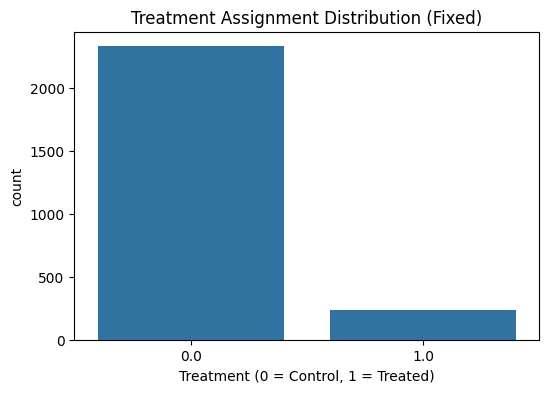

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fix the treatment and outcome arrays by selecting only the first time step
t_fixed = t[:, 0]  # First column only
yf_fixed = yf[:, 0]  # First column only

print("Fixed Treatment Shape:", t_fixed.shape)
print("Fixed Outcome Shape:", yf_fixed.shape)
print("Unique Treatment Values:", np.unique(t_fixed, return_counts=True))
print("Unique Outcome Values:", np.unique(yf_fixed, return_counts=True))

# Corrected Treatment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=t_fixed)
plt.title("Treatment Assignment Distribution (Fixed)")
plt.xlabel("Treatment (0 = Control, 1 = Treated)")
plt.show()

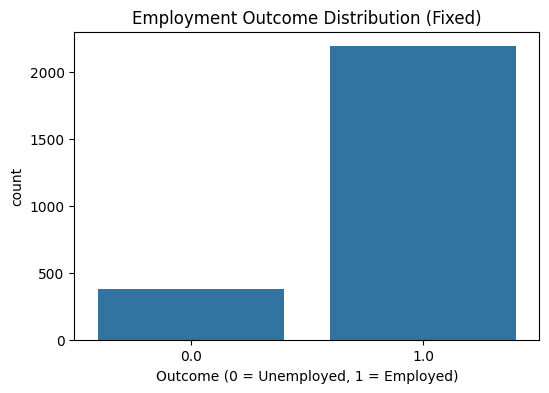

In [12]:
# Corrected Outcome Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=yf_fixed)
plt.title("Employment Outcome Distribution (Fixed)")
plt.xlabel("Outcome (0 = Unemployed, 1 = Employed)")
plt.show()

1. **Treatment Assignment (t)**
   - **2333 control (0)**, **237 treated (1)**.
   - This makes sense, as the Jobs dataset is usually **heavily imbalanced** with fewer treated individuals.

2. **Employment Outcome (yf)**
   - **378 unemployed (0)**, **2192 employed (1)**.
   - Most people in the dataset seem to be employed after treatment.

3. **Shapes**
   - **Treatment (`t`)** and **Outcome (`yf`)** are now **(2570,)**.

4. **Plots**
   - Treatment distribution correctly shows an **imbalance** (fewer treated).
   - Outcome distribution suggests most participants **became employed**.

## True Average Treatment Effect (ATE)

The dataset provides the **true ATE**, allowing us to evaluate causal effect estimation methods.

In [13]:
print("True ATE Shape:", ate.shape)
print("True ATE Value:", ate.item())  # Convert to scalar if needed

True ATE Shape: (1, 1)
True ATE Value: 0.07794018617548037


Let's explore and visualize **propensity scores and treatment effects** from different SAE model configurations.

In [15]:
# Set paths
RESULTS_DIR = "Results/Output/"
PROPENSITY_FILES = {
    "SAE_E2E": ["SAE_E2E_Prop_score_9.csv", "SAE_E2E_Prop_score_9_mmd.csv"],
    "SAE_stacked_all": ["SAE_stacked_all_Prop_score_9.csv", "SAE_stacked_all_Prop_score_9_mmd.csv"],
    "SAE_stacked_cur": ["SAE_stacked_cur_Prop_score_9.csv", "SAE_stacked_cur_Prop_score_9_mmd.csv"]
}

## Loading Propensity Scores

The following function loads **propensity scores** from CSV files, ensuring the data structure is consistent.

In [16]:
# Load propensity scores
def load_propensity_scores(files_dict, directory):
    dataframes = {}
    for model, files in files_dict.items():
        dataframes[model] = []
        for file in files:
            path = os.path.join(directory, file)
            if os.path.exists(path):
                df = pd.read_csv(path, index_col=0)  # Read file and ignore index column
                if df.shape[1] == 1:  # Ensure single-column structure
                    dataframes[model].append(df.iloc[:, 0])  # Extract scores column
                else:
                    print(f"Unexpected format in {file}")
            else:
                print(f"File not found: {path}")
    return dataframes

# Load the data
propensity_data = load_propensity_scores(PROPENSITY_FILES, RESULTS_DIR)

## Visualizing Propensity Scores

We visualize **propensity score distributions** using histograms and density plots.

In [18]:
# Visualizing propensity scores
def plot_histogram(df1, df2, title):
    plt.figure(figsize=(8, 5))
    sns.histplot(df1, bins=50, kde=True, label="SAE", alpha=0.5)
    sns.histplot(df2, bins=50, kde=True, label="WAE_MMD", alpha=0.5)
    plt.legend()
    plt.title(f"Propensity Score Distribution: {title}")
    plt.xlabel("Propensity Score")
    plt.ylabel("Frequency")
    plt.show()

# Visualizing density plots
def plot_density(df1, df2, title):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df1, fill=True, alpha=0.5, label="SAE")
    sns.kdeplot(df2, fill=True, alpha=0.5, label="WAE_MMD")
    plt.legend()
    plt.title(f"Propensity Score Density: {title}")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.show()

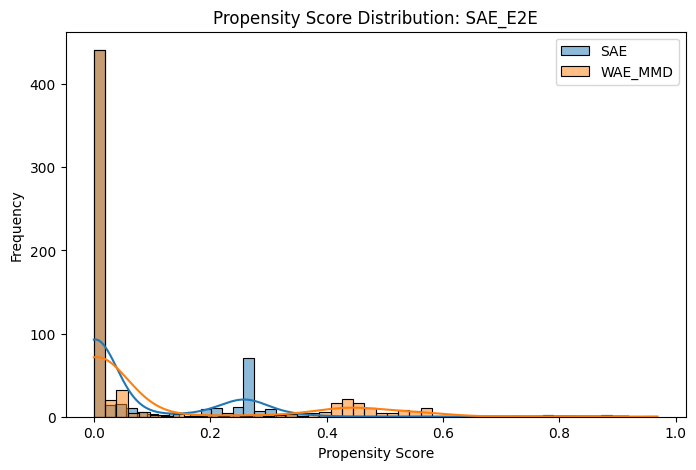

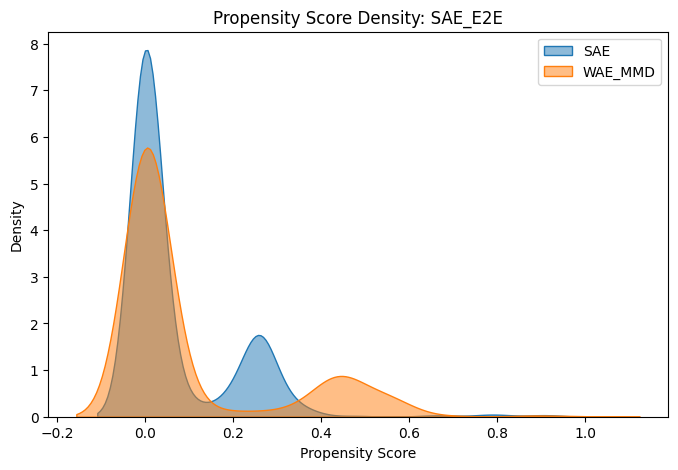

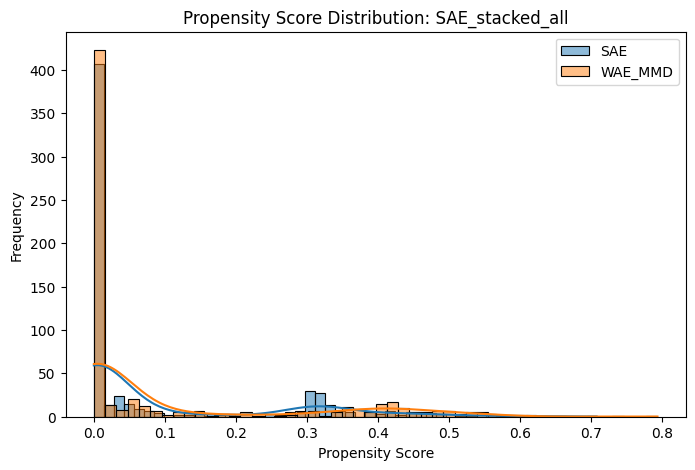

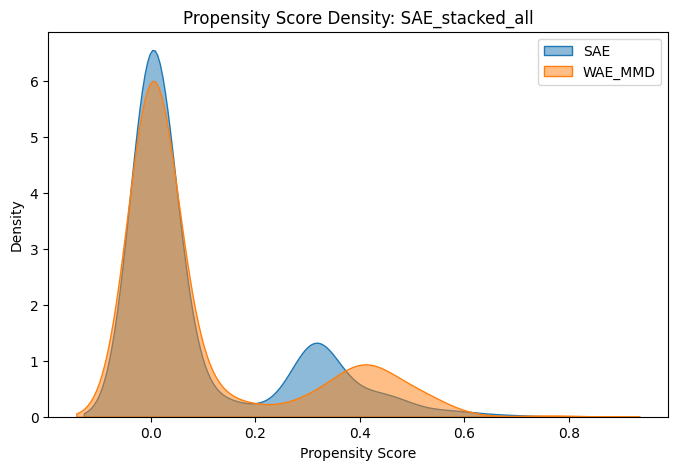

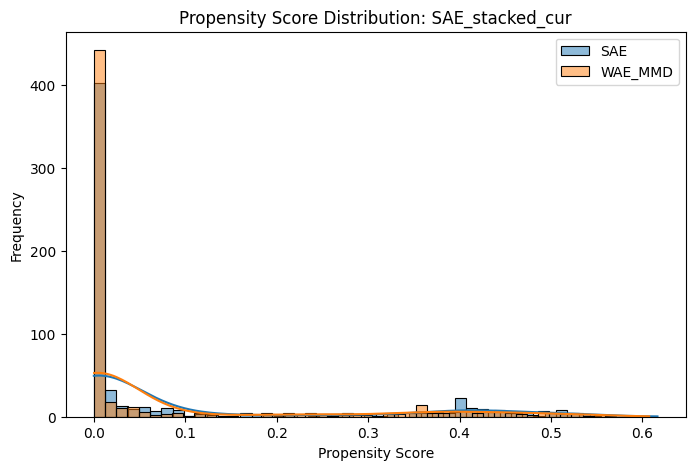

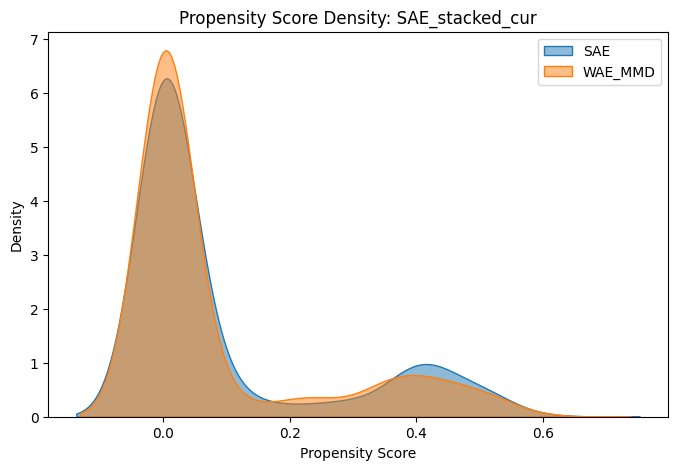

In [19]:
# Generate plots for each model
for model, dfs in propensity_data.items():
    if len(dfs) == 2:
        plot_histogram(dfs[0], dfs[1], model)
        plot_density(dfs[0], dfs[1], model)

## Loading SAE Model Results

The following function loads **SAE-predicted ATE values** for different configurations.


In [20]:
SAE_RESULTS_FILES = {
    "SAE_E2E": ["Results/Output/Results_consolidated.csv", "Results/Output/Results_consolidated_mmd.csv"],
    "SAE_stacked_all": ["Results/Output/Results_consolidated.csv", "Results/Output/Results_consolidated_mmd.csv"],
    "SAE_stacked_cur": ["Results/Output/Results_consolidated.csv", "Results/Output/Results_consolidated_mmd.csv"]
}

SAE_COLUMNS = {
    "SAE_E2E": ["SAE_e2e_ate_pred"],
    "SAE_stacked_all": ["SAE_stacked_all_layer_active_ate_pred"],
    "SAE_stacked_cur": ["SAE_stacked_cur_layer_active_ate_pred"]
}

# Load SAE results data
def load_sae_results(files_dict, columns_dict):
    sae_data = {}
    for model, files in files_dict.items():
        sae_data[model] = []
        for file in files:
            if os.path.exists(file):
                df = pd.read_csv(file, index_col=0)
                df_selected = df[columns_dict[model]] if all(col in df.columns for col in columns_dict[model]) else None
                if df_selected is not None:
                    config_name = "SAE" if "consolidated.csv" in file else "WAE_MMD"
                    df_selected = df_selected.rename(columns={columns_dict[model][0]: f"{model}_{config_name}"})
                    sae_data[model].append(df_selected)
                else:
                    print(f"Unexpected format in {file} for {model}")
            else:
                print(f"File not found: {file}")
    return sae_data

# Load the SAE data
sae_data = load_sae_results(SAE_RESULTS_FILES, SAE_COLUMNS)

## Comparing Estimated ATE with True ATE

We compare the **true ATE value** with the estimated ATE values from different SAE models.


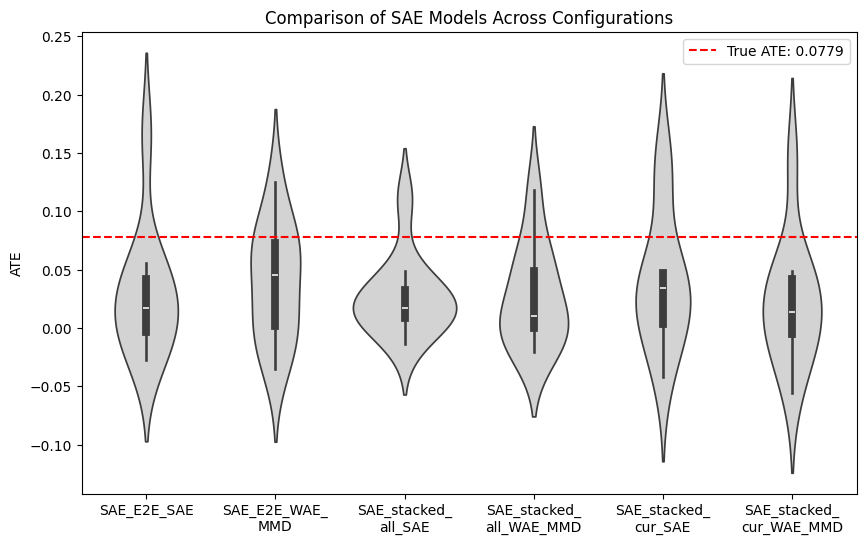

In [22]:
# Extract True ATE
true_ate = data["ate"].item()

# Combined Violin Plot for All Models and Configurations
def plot_combined_violin(sae_data, true_ate):
    plt.figure(figsize=(10, 6))
    data_to_plot = pd.concat([pd.concat(dfs, axis=1) for dfs in sae_data.values()], axis=1)
    
    sns.violinplot(data=data_to_plot, inner="box", color="#D3D3D3")  # Light grey color
    
    plt.axhline(y=true_ate, color='r', linestyle='--', label=f"True ATE: {true_ate:.4f}")
    plt.legend()
    
    plt.title("Comparison of SAE Models Across Configurations")
    plt.ylabel("ATE")

    # Wrapping the x-tick labels to avoid rotation
    labels = [textwrap.fill(label, width=12) for label in data_to_plot.columns]
    plt.xticks(ticks=range(len(labels)), labels=labels, ha='center')

    plt.show()

# Generate combined violin plot with True ATE
plot_combined_violin(sae_data, true_ate)